In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Memuat dataset
df = pd.read_excel("survei_produktivitas_pendapatan_masyarakat.xlsx")

# Memilih kolom fitur untuk klustering (semua kecuali ID dan label asli)
kolom_fitur = df.columns.drop(['ID', 'Tingkat_Pendapatan'])
data_fitur = df[kolom_fitur]

print("5 baris pertama dari data fitur:")
print(data_fitur.head())

5 baris pertama dari data fitur:
   Usia Tingkat_Pendidikan  Jam_Kerja_Mingguan     Jenis_Pekerjaan  \
0    24           Menengah                  40     Karyawan Swasta   
1    38             Tinggi                  50                 PNS   
2    29             Rendah                  55  Wiraswasta Digital   
3    45             Rendah                  48        Buruh Pabrik   
4    35             Tinggi                  45     Karyawan Swasta   

  Punya_Kerja_Sampingan  Tahun_Pengalaman Literasi_Digital   Jenis_Wilayah  
0                    Ya                 2           Tinggi       Perkotaan  
1                 Tidak                15           Sedang  Pinggiran Kota  
2                    Ya                 4           Tinggi       Perkotaan  
3                 Tidak                20           Rendah       Perdesaan  
4                 Tidak                10           Tinggi       Perkotaan  


In [10]:
# Mengubah fitur kategorikal menjadi numerik
data_fitur_encoded = pd.get_dummies(data_fitur, drop_first=True)

# Standarisasi data
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(data_fitur_encoded)

print("Ukuran data setelah di-encode dan distandarkan:", data_distandarkan.shape)


Ukuran data setelah di-encode dan distandarkan: (100, 15)


In [11]:
# Menerapkan K-Means dengan 4 kluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(data_distandarkan)

# Menambahkan label kluster ke DataFrame asli
df['Kluster'] = kmeans.labels_

print("Contoh hasil klustering:")
print(df[['ID', 'Kluster']].head())

Contoh hasil klustering:
   ID  Kluster
0   1        0
1   2        2
2   3        0
3   4        1
4   5        0


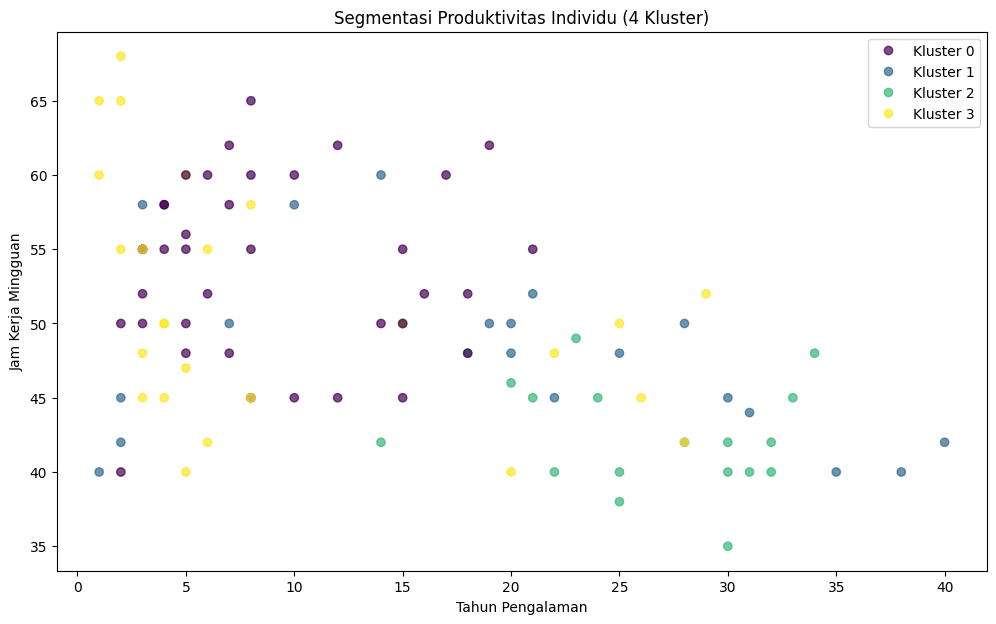

In [12]:
# Plot hasil kluster
plt.figure(figsize=(12, 7))
scatter = plt.scatter(df['Tahun_Pengalaman'], df['Jam_Kerja_Mingguan'], c=df['Kluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Tahun Pengalaman')
plt.ylabel('Jam Kerja Mingguan')
plt.title('Segmentasi Produktivitas Individu (4 Kluster)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Kluster 0', 'Kluster 1', 'Kluster 2', 'Kluster 3'])
plt.show()

In [13]:
# Menyiapkan data untuk klasifikasi
X = data_distandarkan
y = df['Kluster']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (70, 15)
Ukuran data uji: (30, 15)


In [14]:
# Melatih model RandomForest untuk memprediksi kluster
model_klasifikasi = RandomForestClassifier(n_estimators=100, random_state=42)
model_klasifikasi.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model_klasifikasi.predict(X_test)

# Mengevaluasi model
akurasi = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi Model Klasifikasi: {akurasi * 100:.2f}%")
print("\nClassification Report:")
print(report)

Akurasi Model Klasifikasi: 96.67%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5

    accuracy                           0.97        30
   macro avg       0.96      0.99      0.97        30
weighted avg       0.97      0.97      0.97        30

